In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import numpy as np
import ta
from os.path import exists
import re
import string
import nltk
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
import eco2ai
import difflib
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from ptls.preprocessing import PandasDataPreprocessor
from ptls.data_load.utils import FeatureDict
from sklearn.preprocessing import Normalizer

### Graphs

In [2]:
def create_price_graph(data):
    fig, ax = plt.subplots(figsize=(10,5))

    ax.grid()
    ax.set_title("Daily adjusted close price (Normalized)")
    
    for ticker in data.columns.levels[0]:
        ax.plot(data.index, data[ticker]['Adj Close'] / data[ticker]['Adj Close'][0], label=ticker)

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')

    ax.legend()

def create_volume_graph(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
    colors = plt.rcParams["axes.prop_cycle"]()

    plt.suptitle("Weekly trading volume")

    for ticker, ax in zip(data.columns.levels[0], axes.ravel()):
        vol = data[ticker].Volume
        ax.bar(vol.index, vol, width=7, color=next(colors)["color"])
        ax.set_title(ticker)

def create_volume_graph(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
    colors = plt.rcParams["axes.prop_cycle"]()

    plt.suptitle("Weekly trading volume")

    for ticker, ax in zip(data.columns.levels[0], axes.ravel()):
        vol = data[ticker].Volume
        ax.bar(vol.index, vol, width=7, color=next(colors)["color"])
        ax.set_title(ticker)

def correlation(data):
    return_df = pd.DataFrame()
    for ticker in data.columns.levels[0]:
        return_df[ticker] = data[ticker].Close.pct_change(1).dropna()
    graph = sns.pairplot(return_df, diag_kind='kde')
    graph.map_lower(sns.kdeplot, levels=5, color=".3")
    print(return_df.corr())
    return return_df

def volatility(data):
    for i, ticker in enumerate(data.columns):
        plt.subplot(7, 1, i+1)
        plt.title(ticker)
        data[ticker].plot(figsize=(12,25))
        plt.grid()
        plt.ylim((-0.2, 0.2))

In [3]:
id_to_ticker_path = "Datasets/kaggle/Company_Tweet.csv"
ticker_to_name_path = "Datasets/kaggle/Company.csv"

tickers_df = pd.read_csv(id_to_ticker_path)
company_name_df = pd.read_csv(ticker_to_name_path)
tickers = company_name_df.ticker_symbol.tolist()

In [4]:
market_data = yf.download((' ').join(tickers), start="2011-01-01", end="2020-01-01", group_by = 'ticker')

[*********************100%***********************]  6 of 6 completed


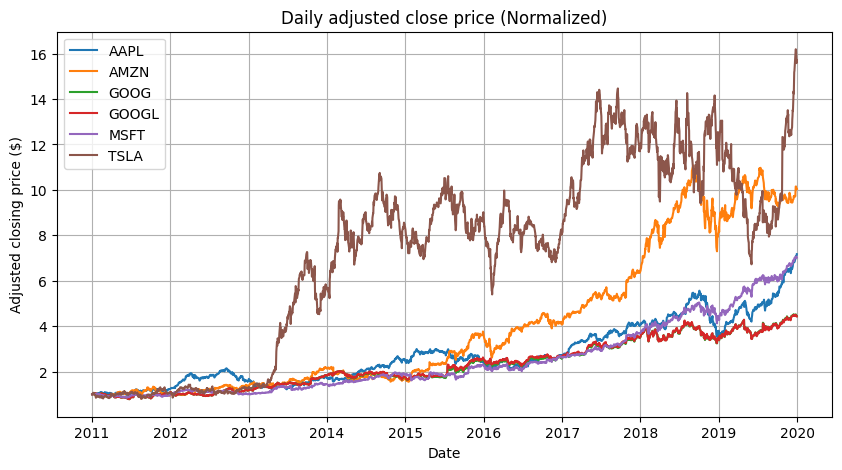

In [5]:
create_price_graph(market_data)

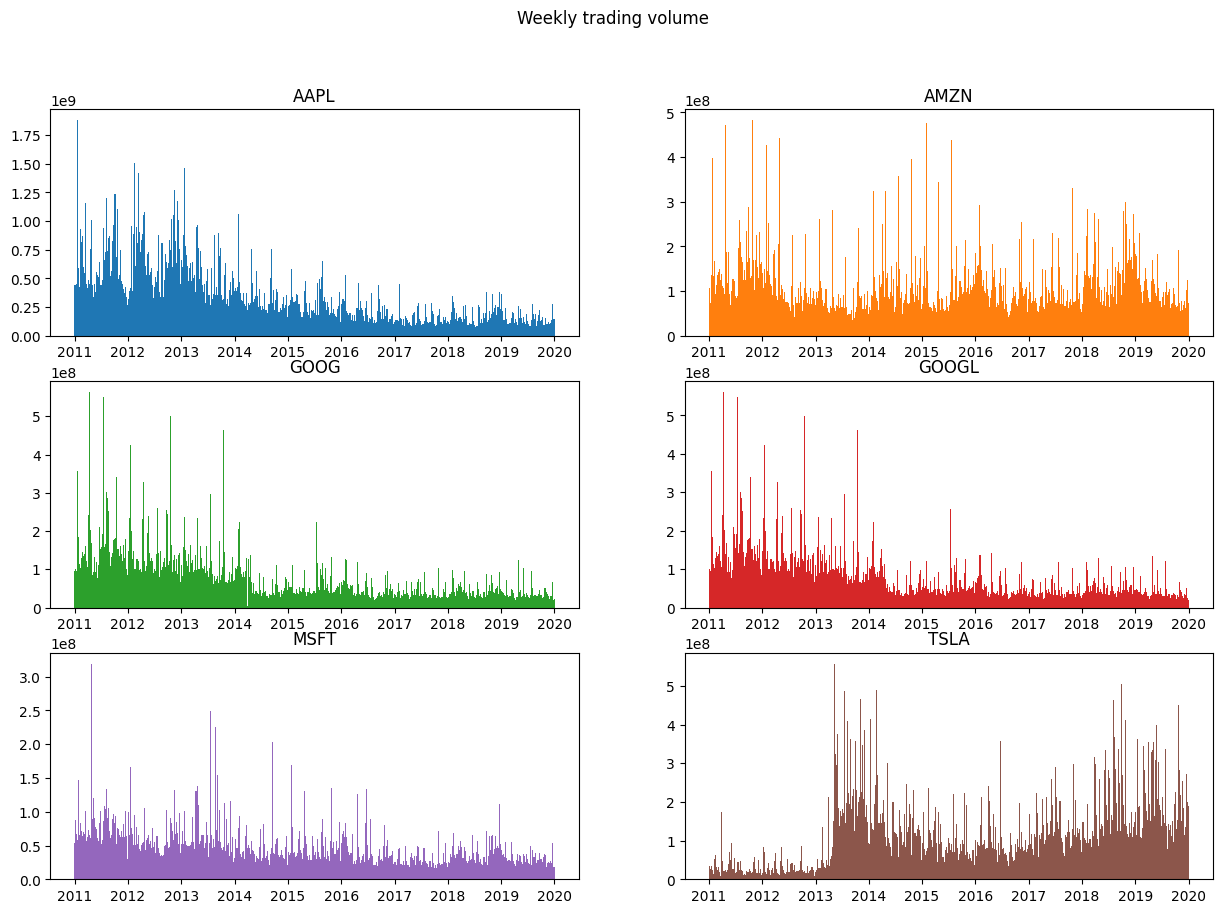

In [6]:
create_volume_graph(market_data)

### Correlation

There is a decent ammout of correlation between each stock except TSLA.

           AAPL      AMZN      GOOG     GOOGL      MSFT      TSLA
AAPL   1.000000  0.382003  0.447941  0.446677  0.442318  0.259456
AMZN   0.382003  1.000000  0.551820  0.552355  0.487669  0.293886
GOOG   0.447941  0.551820  1.000000  0.994705  0.543149  0.283091
GOOGL  0.446677  0.552355  0.994705  1.000000  0.538092  0.285128
MSFT   0.442318  0.487669  0.543149  0.538092  1.000000  0.272468
TSLA   0.259456  0.293886  0.283091  0.285128  0.272468  1.000000


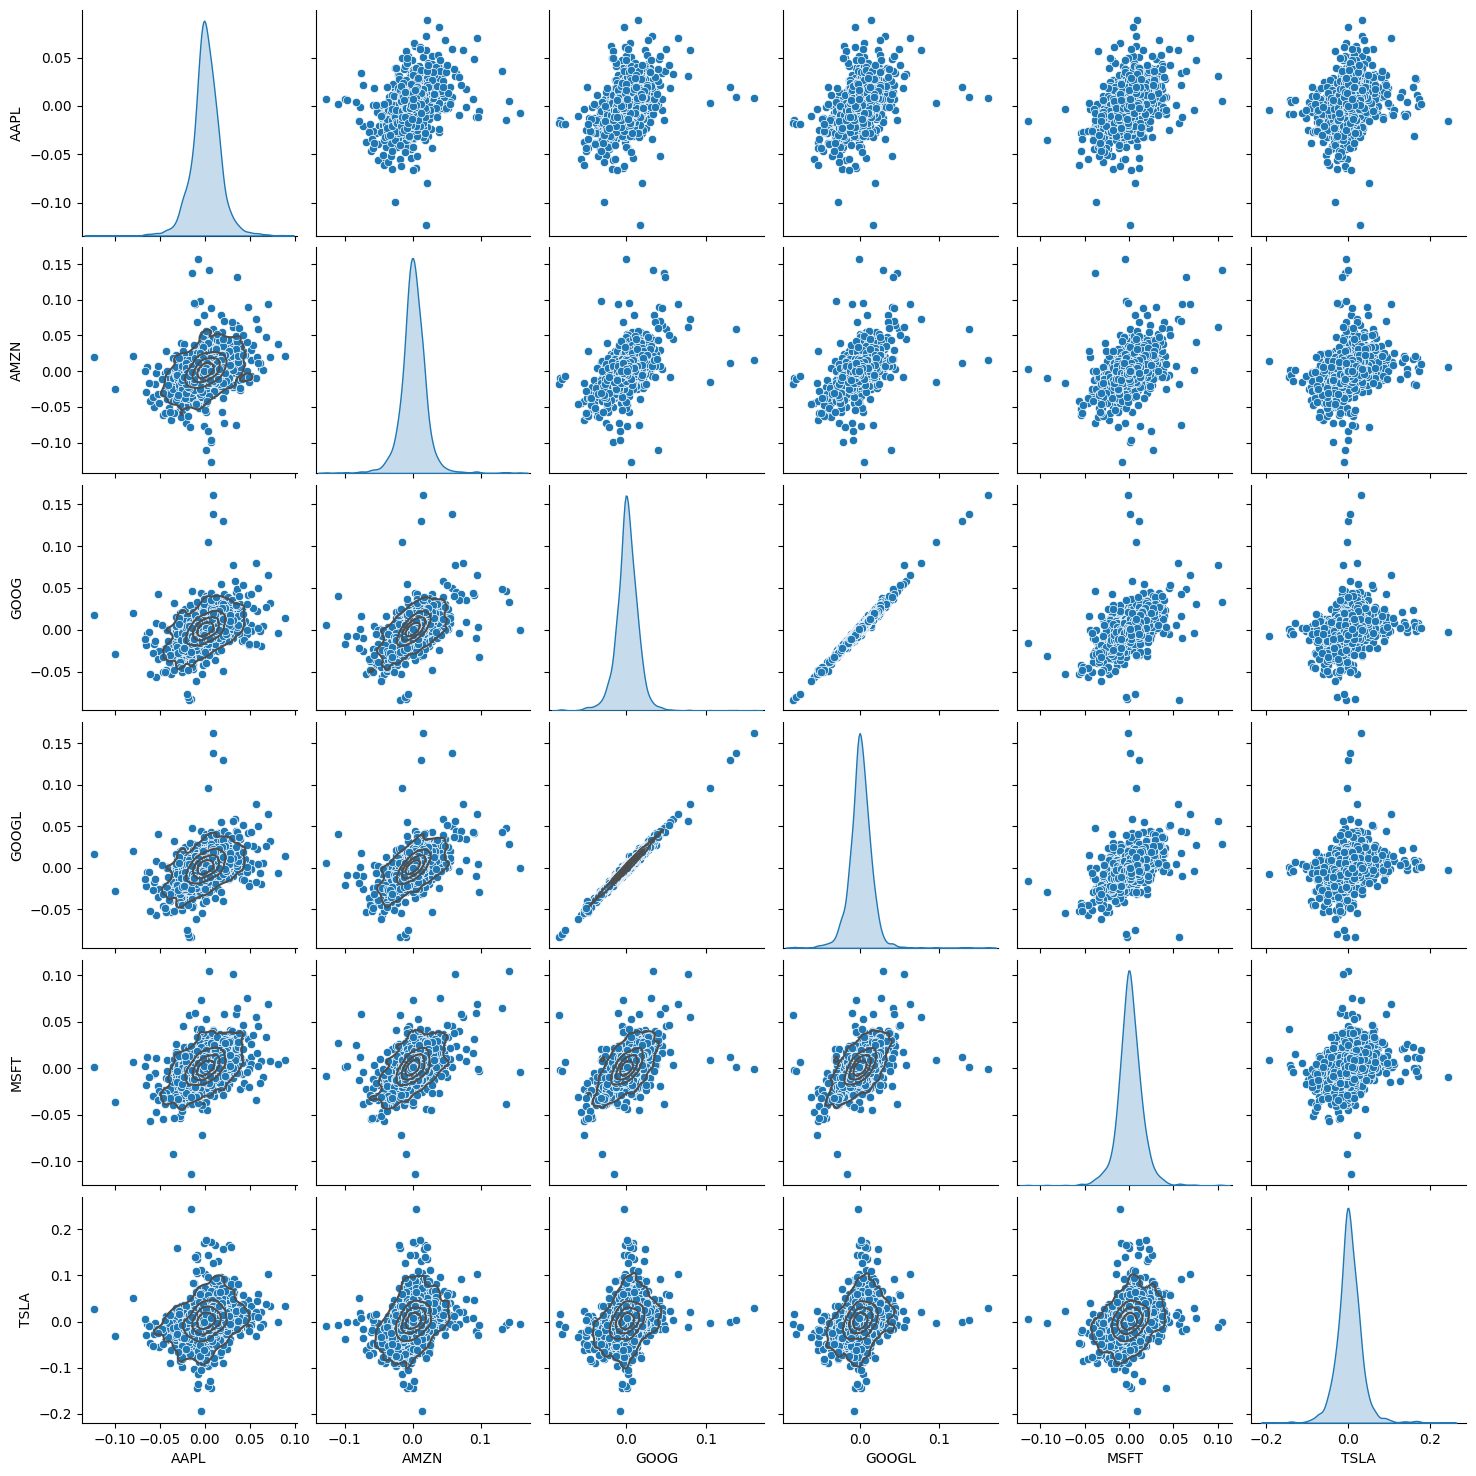

In [7]:
returns = correlation(market_data)

### Volatility

As we can see TSLA is the most volatile stock.

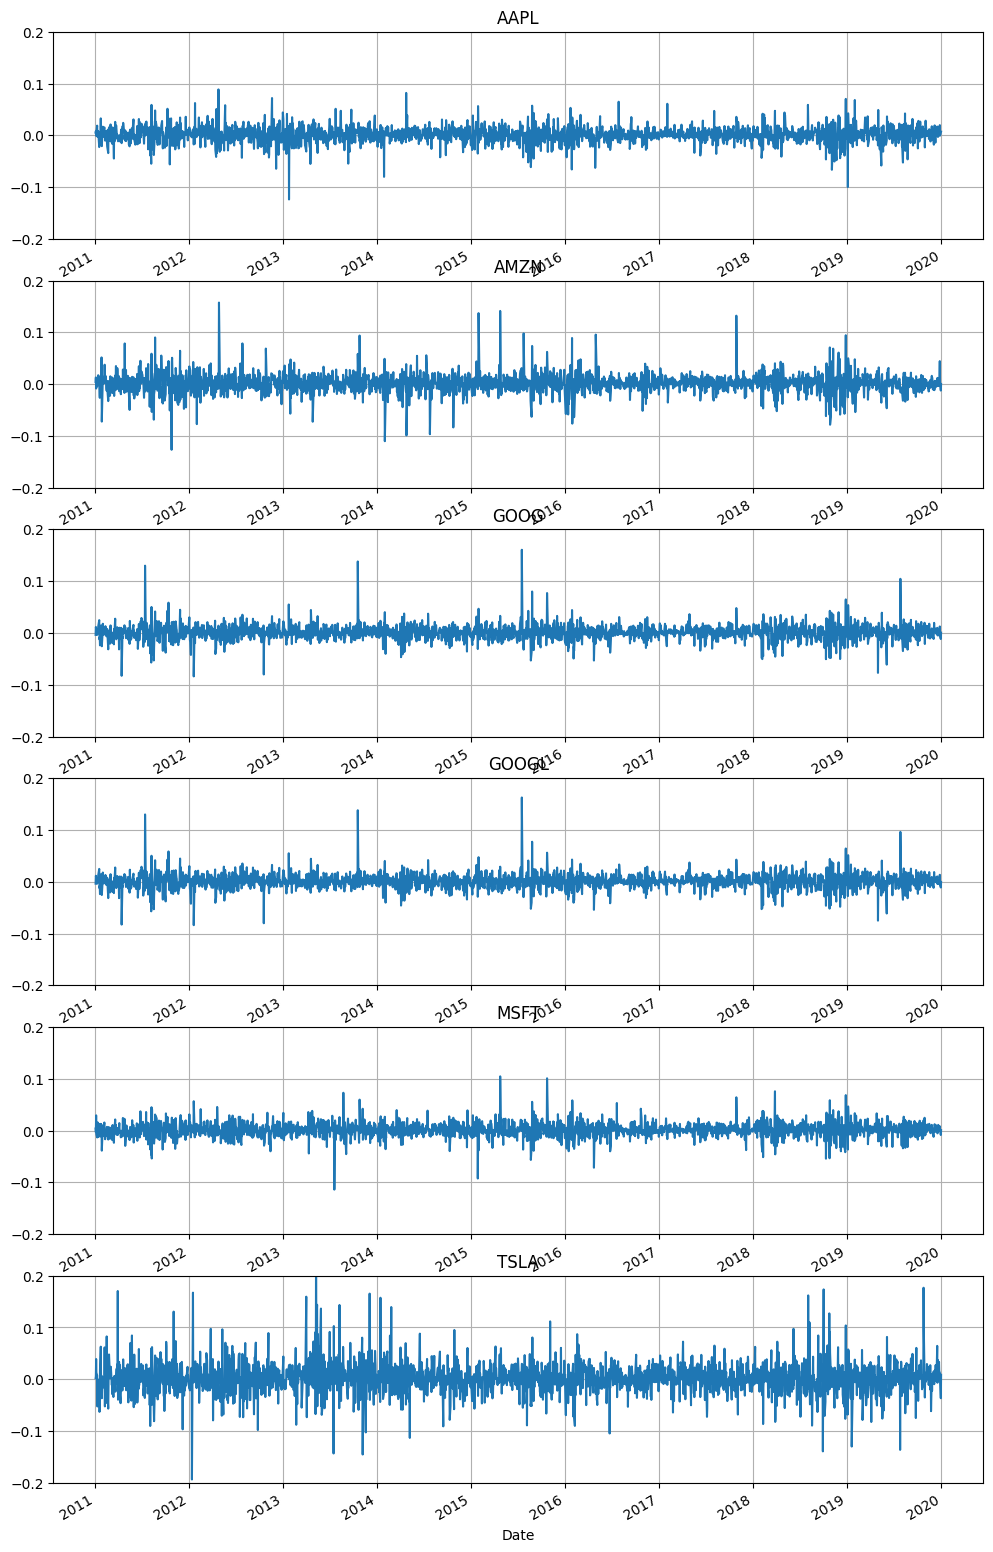

In [8]:
volatility(returns)